<a href="https://colab.research.google.com/github/nvdivya/codeclause_task1/blob/main/data_science1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Market Basket Analysis in Python using Apriori Algorithm

# Importing Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import warnings
warnings.filterwarnings("ignore")
     

# Reading the Dataset

In [4]:
data = pd.read_csv('/content/Groceries_dataset.csv')

In [5]:
data

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


# Shape of the DataSet

In [6]:
data.shape

(38765, 3)

In [7]:
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [8]:
data.tail()

,Member_number,Date,itemDescription
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice
38764,1521,26-12-2014,cat food


In [9]:
data.sample(10)

,Member_number,Date,itemDescription
25475,1138,07-07-2014,napkins
4160,4286,06-06-2015,other vegetables
33518,3862,24-03-2014,artif. sweetener
37640,4762,08-07-2014,newspapers
13443,1788,19-09-2014,brown bread
29530,1420,25-03-2014,cat food
14143,4032,18-07-2014,root vegetables
33384,1009,24-01-2014,canned fish
31092,2076,06-09-2014,rolls/buns
2186,2251,23-06-2015,chicken


In [10]:
data.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


# EDA

In [11]:
# Get the top 20 most frequently occurring values
x = data['itemDescription'].value_counts().sort_values(ascending=False)[:20]
     

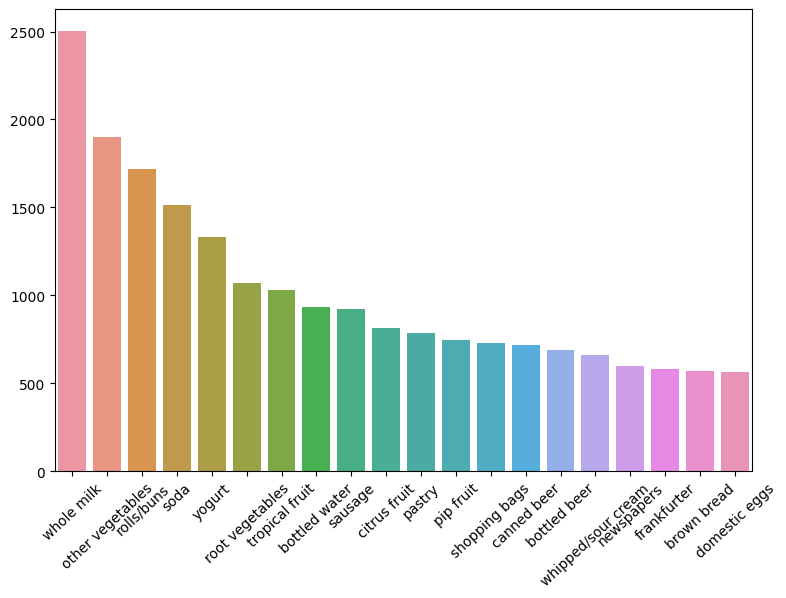

In [12]:
plt.figure(figsize=(9,6))
sns.barplot(x=x.index, y=x.values)
plt.xticks(rotation=43)
plt.show()
     

## Apriori Algorithm

Apriori is an algorithm for frequent item set mining and association rule learning over relational databases.Market basket analysis is typically implemented using association rule learning, which is a technique for discovering interesting relationships between variables in a dataset. One of the most popular algorithms for association rule learning is the Apriori algorithm, which is used to identify frequent item sets and generate association rules. These rules are evaluated using measures such as support, confidence, and lift, which are used to determine the strength of the association between items.bold text

In [13]:
data['Quantity'] = 1

In [14]:
data

,Member_number,Date,itemDescription,Quantity
0,1808,21-07-2015,tropical fruit,1
1,2552,05-01-2015,whole milk,1
2,2300,19-09-2015,pip fruit,1
3,1187,12-12-2015,other vegetables,1
4,3037,01-02-2015,whole milk,1
...,...,...,...,...
38760,4471,08-10-2014,sliced cheese,1
38761,2022,23-02-2014,candy,1
38762,1097,16-04-2014,cake bar,1
38763,1510,03-12-2014,fruit/vegetable juice,1


In [15]:
transactions =  data.groupby(['Member_number','itemDescription'])['Quantity'].sum().unstack().reset_index().set_index('Member_number')

In [16]:
transactions = transactions.fillna(0)

In [17]:
transactions

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
def encode(x):
    if x <=0:
        return 0
    elif x>=0:
        return 1

In [19]:
basket = transactions.applymap(encode)
basket

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [21]:
frequent_itemset = apriori(basket, min_support=0.06, use_colnames=True)
rules = association_rules(frequent_itemset, metric='lift', min_threshold=1)

In [22]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,0.009360,1.168919
1,(whole milk),(beef),0.458184,0.119548,0.064135,0.139978,1.170886,0.009360,1.023754
2,(other vegetables),(bottled beer),0.376603,0.158799,0.068497,0.181880,1.145345,0.008692,1.028212
3,(bottled beer),(other vegetables),0.158799,0.376603,0.068497,0.431341,1.145345,0.008692,1.096257
4,(rolls/buns),(bottled beer),0.349666,0.158799,0.063109,0.180484,1.136555,0.007582,1.026461


In [23]:
confidence_threshold = 0.4
lift_threshold = 1
rules[(rules['confidence'] > confidence_threshold) & (rules['lift'] > lift_threshold)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,0.009360,1.168919
3,(bottled beer),(other vegetables),0.158799,0.376603,0.068497,0.431341,1.145345,0.008692,1.096257
6,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672
8,(bottled water),(other vegetables),0.213699,0.376603,0.093894,0.439376,1.166680,0.013414,1.111969
14,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615
18,(brown bread),(whole milk),0.135967,0.458184,0.069779,0.513208,1.120091,0.007481,1.113034
21,(butter),(whole milk),0.126475,0.458184,0.066188,0.523327,1.142176,0.008239,1.136661
23,(canned beer),(other vegetables),0.165213,0.376603,0.067214,0.406832,1.080267,0.004994,1.050962
25,(canned beer),(rolls/buns),0.165213,0.349666,0.066701,0.403727,1.154605,0.008931,1.090663
26,(canned beer),(whole milk),0.165213,0.458184,0.087224,0.527950,1.152268,0.011526,1.147795


**Make Recommendation on Items**

In [24]:
# recommend items based on single or multiple input item
def recommend_items(items, confidence_threshold=0.4, lift_threshold=1):
    if isinstance(items, str):
        # Select the rules that contain the input item as the antecedent and have a confidence greater than the threshold
        recommendations = rules.loc[(rules['antecedents'] == {items}) & (rules['confidence'] > confidence_threshold) & (rules['lift'] > lift_threshold)]
    if isinstance(items, list):
        recommendations = rules.loc[(rules['antecedents'].apply(lambda x: any(item in x for item in items))) & (rules['confidence'] > confidence_threshold)]
    # Extract the consequents of the selected rules as the recommended items
    recommended_items = recommendations['consequents'].apply(lambda x: list(x)).tolist()
    # Flatten the list of recommended items
    recommended_items = [item for sublist in recommended_items for item in sublist if item not in items]
    return list(set(recommended_items))

In [25]:
# recommend items for single i/p item
recommend_items("curd")

['whole milk']

In [26]:
# recommend items for multiple i/p items
recommend_items(["buns", "yogurt"])

['other vegetables', 'rolls/buns', 'whole milk']

In [27]:
recommend_items("soda")

['whole milk']